In [48]:
import pandas as pd
import numpy as np
import os
import nltools as nlt
import nilearn as nil
import nibabel as nib
import warnings
import glob
import random
import pickle

In [49]:
pd.set_option('display.max_rows', 99)

In [63]:
with open('../data/Brain_Data_25subs.pkl', 'rb') as pkl_file:
    Brain_Data_allsubs = pickle.load(pkl_file)

In [ ]:
/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/fx/multiconds/WTP/betaseries/DEV043_2_WTP1.mat

now what do we do next?

Let's do a cross-validation across subjects. This is a bit harder! But we'll get an idea.

In [21]:
Brain_Data_allsubs.X.columns

Index(['beta', 'type', 'task', 'event_id', 'isi_pre', 'onset', 'duration',
       'food_pic', 'food_num', 'cond', 'health_cond', 'liking_cond',
       'liking_rating', 'response', 'isi_post', 'end', 'run', 'wave',
       'subject'],
      dtype='object')

In [22]:
Brain_Data_allsubs.Y = Brain_Data_allsubs.X.liking_rating

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.65721e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.35772e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.24624e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.15781e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsig

overall Root Mean Squared Error: 0.00
overall Correlation: 1.00
overall CV Root Mean Squared Error: 1.46
overall CV Correlation: 0.24


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


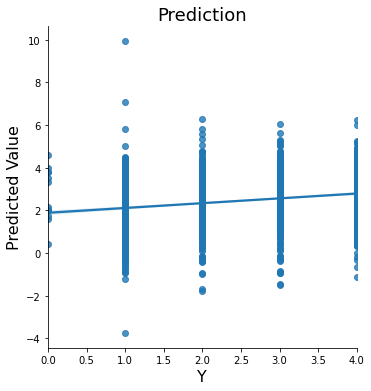

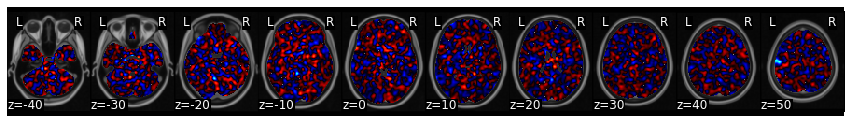

In [23]:
prediction_across_subjects = Brain_Data_allsubs.predict(algorithm='ridge',
                           cv_dict = {'type':'kfolds',
                                      'n_folds':5,
                                      'subject_id':Brain_Data_allsubs.X.subject})

Now we try within-subject; nb this is not _necessarily_ across subject.

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.65721e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=False, random_state=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.08475e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.187e-09): result may not be

overall Root Mean Squared Error: 0.00
overall Correlation: 1.00
overall CV Root Mean Squared Error: 1.25
overall CV Correlation: 0.39


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


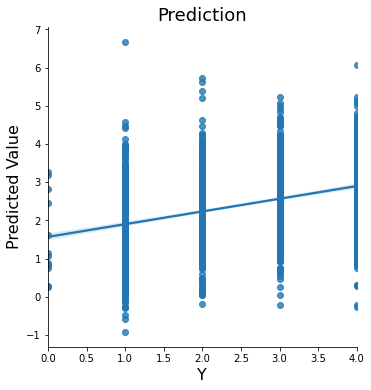

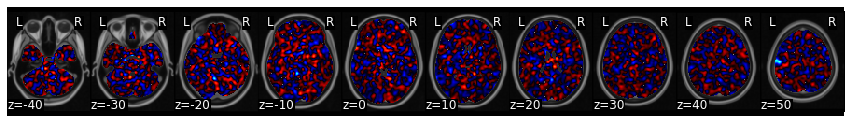

In [24]:
prediction_stratified = Brain_Data_allsubs.predict(algorithm='ridge',
                           cv_dict = {'type':'kfolds',
                                      'n_folds':5,
                                      'stratified':Brain_Data_allsubs.Y})

## Validation and holdout

OK that's a basic investigation. We have dealth with validation and hold-out previously, in `load_multisubject_brain_data.ipynb`. That file creates a training set and also assigns a holdout set 20% of the size of the training set.

If we have assigned a hold-out/test set, and we are doing cross-validation, we don't need a separate validation set on top as well. See:

Some references:

 - https://machinelearningmastery.com/difference-test-validation-datasets/
 - https://www.datarobot.com/wiki/training-validation-holdout/#:~:text=Sometimes%20referred%20to%20as%20%E2%80%9Ctesting,for%20improving%20or%20tuning%20algorithms.
 - https://medium.com/@eijaz/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f
 
The Jason Brownlee article makes it pretty clear that cross-validation makes the validation set redundant. However, it doesn't necessarily make a test set--a final check at the end--irrelevant. So we'll create a hold-out by chagning the function that grabs the data to exclude a set of subjects.

## Results

In [64]:
Brain_Data_allsubs.X.response.value_counts()

5       596
6       527
7       443
8       307
NULL     47
Name: response, dtype: int64

A final word for today: can we predict the WTP choice? Now, remember that this data is likely conflated by keypress, so...there's that to be concerned about.

In [65]:
Brain_Data_allsubs.Y = Brain_Data_allsubs.X.response.copy()

In [66]:
Brain_Data_allsubs.Y.value_counts()

5       596
6       527
7       443
8       307
NULL     47
Name: response, dtype: int64

In [67]:
Brain_Data_allsubs.Y[Brain_Data_allsubs.Y=='NULL']=None

to do this we need to remove the null-response items.

In [71]:
Brain_Data_allsubs.Y.value_counts()

5    596
6    527
7    443
8    307
Name: response, dtype: int64

In [72]:
Brain_Data_allsubs.Y.isnull().value_counts()

False    1873
True       47
Name: response, dtype: int64

In [73]:
Brain_Data_allsubs_nn = Brain_Data_allsubs[Brain_Data_allsubs.Y.isnull()==False]

In [74]:
print(len(Brain_Data_allsubs_nn))
print(len(Brain_Data_allsubs))

1873
1920


In [75]:
Brain_Data_allsubs_nn.Y=Brain_Data_allsubs_nn.Y.astype(int)

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.92809e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.22319e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.23854e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.80836e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsig

overall Root Mean Squared Error: 0.00
overall Correlation: 1.00
overall CV Root Mean Squared Error: 1.10
overall CV Correlation: 0.44


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


{'Y': array([7, 5, 5, ..., 8, 7, 7]), 'yfit_all': array([6.999956 , 4.9999666, 4.9999733, ..., 7.9999437, 6.999983 ,
       6.9999943], dtype=float32), 'intercept': 6.999571, 'weight_map': nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[]), 'yfit_xval': array([5.710424 , 6.20091  , 6.0747294, ..., 7.047273 , 7.2621813,
       7.1110168], dtype=float32), 'intercept_xval': [6.0414524, 6.999695, 6.9996653, 6.99972, 6.9996843], 'weight_map_xval': nltools.data.brain_data.Brain_Data(data=(5, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[]), 'cv_idx': [(array([   0,    1,    2, ..., 1870, 1871, 1872]), array([ 310,  311,  312,  313,  314,  315,  316,  317,  318,  319,  320,
        321,  322,  323,  324,  325,  326,  327,  328,  329,  330,  331,
        332,  333,  334,  335,  336,  337,  338,  339,  340,  341,  342,
        343,  344,  345,  346,  347,  348,  349,  350,  351,  352,  353,
       

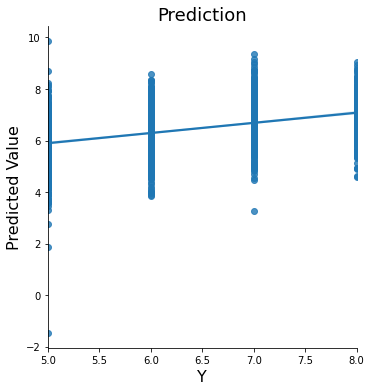

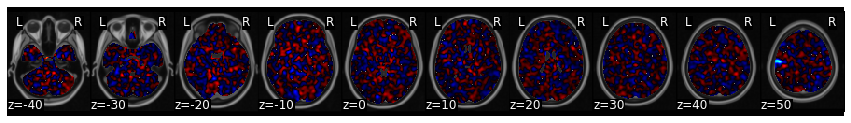

In [83]:
prediction_across_subjects = Brain_Data_allsubs_nn.predict(algorithm='ridge',
                           cv_dict = {'type':'kfolds',
                                      'n_folds':5,
                                      'subject_id':Brain_Data_allsubs_nn.X.subject})

print(prediction_across_subjects)


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.92809e-10): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=False, random_state=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.12283e-09): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.26988e-09): result may not 

overall Root Mean Squared Error: 0.00
overall Correlation: 1.00
overall CV Root Mean Squared Error: 0.88
overall CV Correlation: 0.61


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


{'Y': array([7, 5, 5, ..., 8, 7, 7]), 'yfit_all': array([6.999956 , 4.9999666, 4.9999733, ..., 7.9999437, 6.999983 ,
       6.9999943], dtype=float32), 'intercept': 6.999571, 'weight_map': nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[]), 'yfit_xval': array([6.1357493, 5.9992914, 4.9934154, ..., 6.361889 , 6.2052484,
       6.9288783], dtype=float32), 'intercept_xval': [6.1486373, 6.9997115, 6.999654, 6.999684, 6.9996443], 'weight_map_xval': nltools.data.brain_data.Brain_Data(data=(5, 238955), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[]), 'cv_idx': [(array([   0,    1,    2, ..., 1870, 1871, 1872]), array([   4,    9,   13,   17,   18,   20,   21,   31,   32,   34,   35,
         39,   40,   49,   60,   67,   68,   71,   76,   81,   85,   87,
         89,   99,  102,  103,  105,  111,  120,  137,  149,  162,  169,
        170,  183,  186,  199,  202,  206,  207,  212,  218,  220,  224,
      

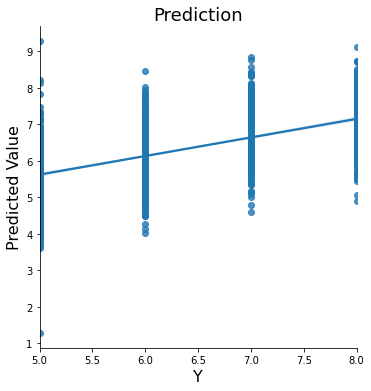

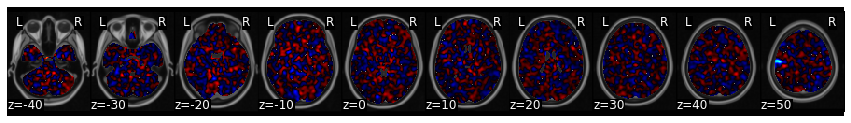

In [82]:
prediction_stratified = Brain_Data_allsubs_nn.predict(algorithm='ridge',
                           cv_dict = {'type':'kfolds',
                                      'n_folds':5,
                                      'stratified':Brain_Data_allsubs_nn.Y.astype(int)})

print(prediction_stratified)

How should we measure chance performance? One way is to re-run this 1000 times with dummy-assigned y variables and record the output, but there must be an easier way to do that?

In [84]:
import scipy.io

scipy.io.loadmat(
    '/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/fx/multiconds/WTP/betaseries/DEV041_1_WTP1.mat',
    simplify_cells=True)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Nov 11 18:15:26 2019',
 '__version__': '1.0',
 '__globals__': [],
 'durations': array([6.185436605010182, 4.655617940006778, 4.7877428109932225,
        4.7885573509847745, 4.983934146002866, 6.374967376032146,
        4.672111263993429, 4.461631111014867, 5.001735679979902,
        4.755615144997137, 4.994322073995136, 4.9875507960096,
        5.0624147879716475, 5.770525118015939, 6.023564388975501,
        4.720687535009347], dtype=object),
 'names': array(['trial1', 'trial2', 'trial3', 'trial4', 'trial5', 'trial6',
        'trial7', 'trial8', 'trial9', 'trial10', 'trial11', 'trial12',
        'trial13', 'trial14', 'trial15', 'trial16'], dtype=object),
 'onsets': array([6.064888713997789, 18.658654392987955, 29.997774699993897,
        39.655492844001856, 51.89781110698823, 61.78849491997971,
        73.18043966198456, 84.83816886198474, 95.98007252099342,
        106.35413546400378, 116.57790440600365, 127.0799

In [86]:
Brain_Data_allsubs_nn.X

,beta,type,task,event_id,isi_pre,onset,duration,food_pic,food_num,cond,health_cond,liking_cond,liking_rating,response,isi_post,end,run,wave,subject
0,beta_0001.nii,run1,WTP betas,1,3.000000,6.073365,6.554391,M&Ms.bmp,1,unhealthy_liked,unhealthy,liked,3,7,3.000000,12.627755,run1,1,DEV046
1,beta_0002.nii,run1,WTP betas,2,3.000000,18.666710,6.532560,PeasPlease.bmp,2,healthy_liked,healthy,liked,3,5,1.780283,25.199270,run1,1,DEV046
2,beta_0003.nii,run1,WTP betas,3,1.780283,30.023965,6.521424,cranberries.bmp,3,healthy_liked,healthy,liked,2,5,0.095117,36.545388,run1,1,DEV046
3,beta_0004.nii,run1,WTP betas,4,0.095117,39.680773,6.534298,HotTamales.bmp,4,unhealthy_disliked,unhealthy,disliked,1,5,2.680966,46.215070,run1,1,DEV046
4,beta_0005.nii,run1,WTP betas,5,2.680966,51.924158,6.536259,100grand_small.bmp,5,unhealthy_liked,unhealthy,liked,3,8,0.319097,58.460417,run1,1,DEV046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,beta_0075.nii,run4,WTP betas,12,0.925946,127.131677,6.532547,Fritos.bmp,12,unhealthy_disliked,unhealthy,disliked,1,6,0.670865,133.664224,run4,1,DEV079
1869,beta_0076.nii,run4,WTP betas,13,0.670865,137.381146,6.532186,Chickpeas.bmp,13,healthy_disliked,healthy,disliked,1,5,0.859947,143.913332,run4,1,DEV079
1870,beta_0077.nii,run4,WTP betas,14,0.859947,147.814789,6.532258,Grapefruit.bmp,14,healthy_disliked,healthy,disliked,1,8,0.333113,154.347047,run4,1,DEV079
1871,beta_0078.nii,run4,WTP betas,15,0.333113,157.731072,6.532066,CottageCheese.bmp,15,healthy_liked,healthy,liked,3,7,1.421652,164.263138,run4,1,DEV079


In [87]:
Brain_Data_allsubs_nn.X.cond.value_counts()

unhealthy_disliked    475
healthy_disliked      473
healthy_liked         471
unhealthy_liked       454
Name: cond, dtype: int64

In [88]:
Brain_Data_allsubs_nn.X.liking_rating.value_counts()

1    646
4    487
3    390
2    338
0     12
Name: liking_rating, dtype: int64

In [89]:
Brain_Data_allsubs_nn.X.response.value_counts()

5    596
6    527
7    443
8    307
Name: response, dtype: int64

In [99]:
len(Brain_Data_allsubs.X.subject.value_counts())

30